In [2]:
from ioc2data import ioc2data
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import csv
import glob
import os

In [3]:
direccion_csv=r'Z:\00 Memoria\Tareas\tarea02\data_ioc'#direccion de guardado de los datos

http://www.ioc-sealevelmonitoring.org/bgraph.php?code=juan&output=tab&period=30&endtime=2020-08-01
33908 datos.
Desde 2020-07-02 00:00:00 hasta 2020-07-31 23:57:00
juan_2020-07-02to2020-08-01.txt

http://www.ioc-sealevelmonitoring.org/bgraph.php?code=juan&output=tab&period=30&endtime=2020-07-02
41751 datos.
Desde 2020-06-02 00:00:00 hasta 2020-07-02 00:00:00
juan_2020-06-02to2020-07-02.txt

http://www.ioc-sealevelmonitoring.org/bgraph.php?code=juan&output=tab&period=30&endtime=2020-06-02
42246 datos.
Desde 2020-05-03 00:00:00 hasta 2020-06-02 00:00:00
juan_2020-05-03to2020-06-02.txt

http://www.ioc-sealevelmonitoring.org/bgraph.php?code=juan&output=tab&period=30&endtime=2020-05-03
42376 datos.
Desde 2020-04-03 00:00:00 hasta 2020-05-03 00:00:00
juan_2020-04-03to2020-05-03.txt

http://www.ioc-sealevelmonitoring.org/bgraph.php?code=juan&output=tab&period=30&endtime=2020-04-03
42011 datos.
Desde 2020-03-03 23:00:00 hasta 2020-04-03 00:00:00
juan_2020-03-04to2020-04-03.txt

http://www.ioc-

C:\Users\madia\Google Drive\01 UTFSM\04 Memoria\02 Avances\Python\ioc2data.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(15,3))


38342 datos.
Desde 2018-11-10 00:00:00 hasta 2018-12-09 23:57:00
juan_2018-11-10to2018-12-10.txt

http://www.ioc-sealevelmonitoring.org/bgraph.php?code=juan&output=tab&period=30&endtime=2018-11-10


C:\Users\madia\Google Drive\01 UTFSM\04 Memoria\02 Avances\Python\ioc2data.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(15,3))


39766 datos.
Desde 2018-10-11 01:00:00 hasta 2018-11-10 00:00:00
juan_2018-10-11to2018-11-10.txt

http://www.ioc-sealevelmonitoring.org/bgraph.php?code=juan&output=tab&period=30&endtime=2018-10-11


C:\Users\madia\Google Drive\01 UTFSM\04 Memoria\02 Avances\Python\ioc2data.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(15,3))


40883 datos.
Desde 2018-09-11 00:00:00 hasta 2018-10-10 23:57:00
juan_2018-09-11to2018-10-11.txt

http://www.ioc-sealevelmonitoring.org/bgraph.php?code=juan&output=tab&period=30&endtime=2018-09-11


C:\Users\madia\Google Drive\01 UTFSM\04 Memoria\02 Avances\Python\ioc2data.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(15,3))


39601 datos.
Desde 2018-08-12 00:00:00 hasta 2018-09-11 00:00:00
juan_2018-08-12to2018-09-11.txt



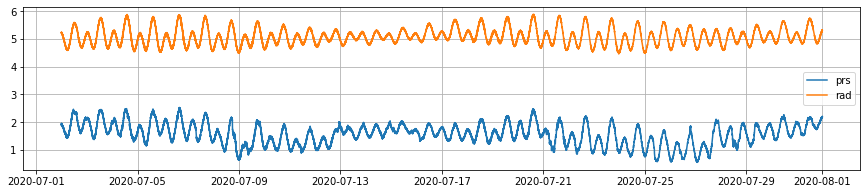

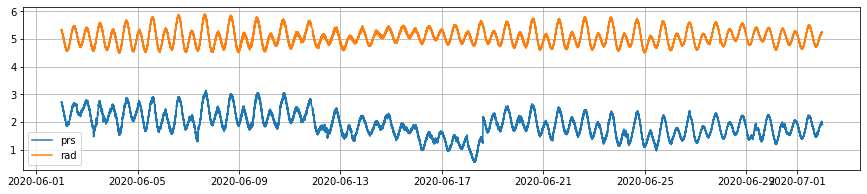

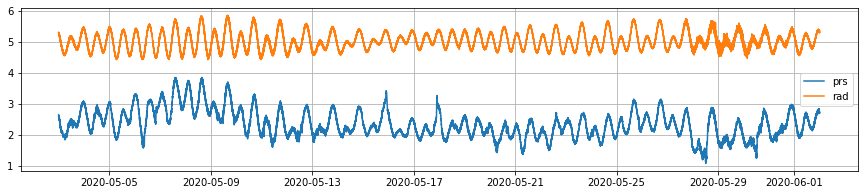

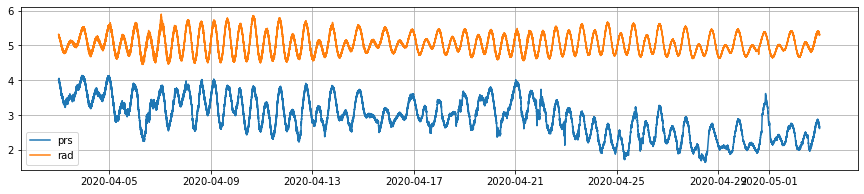

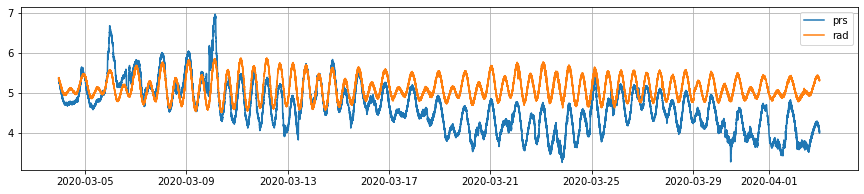

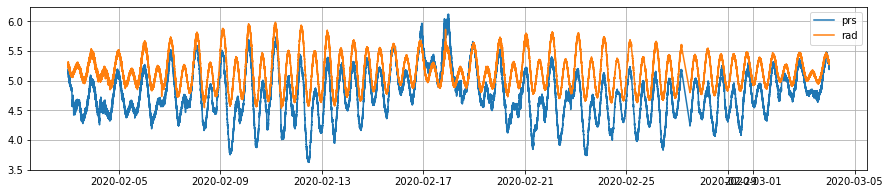

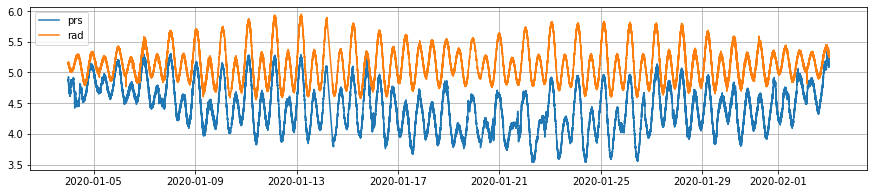

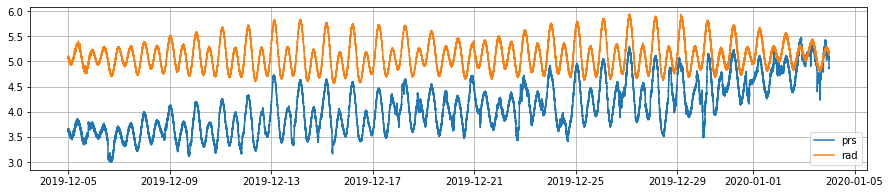

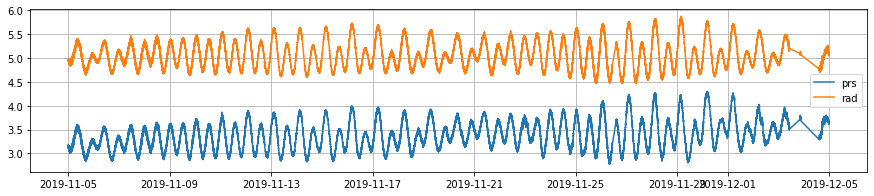

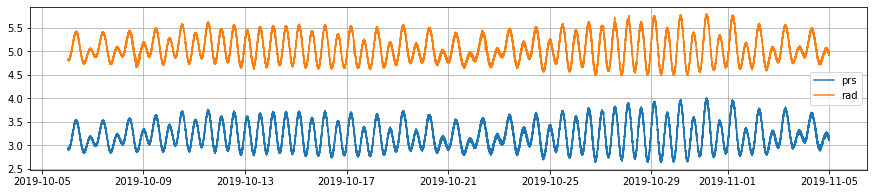

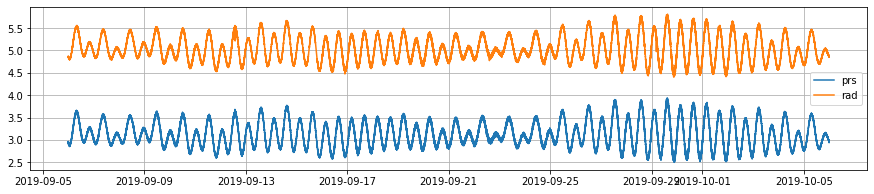

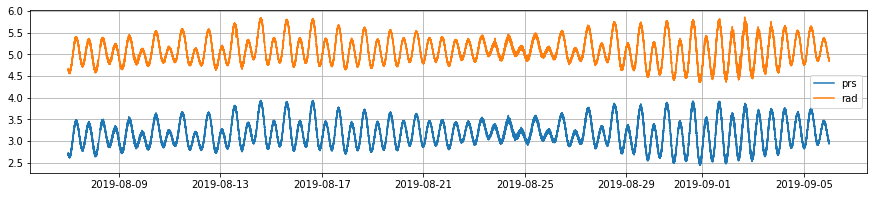

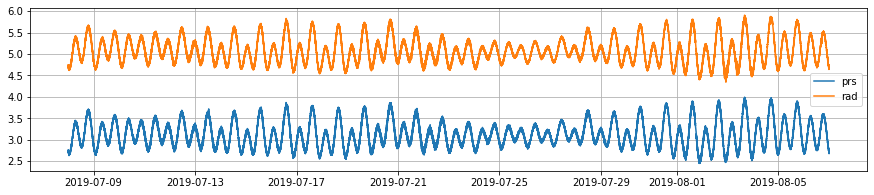

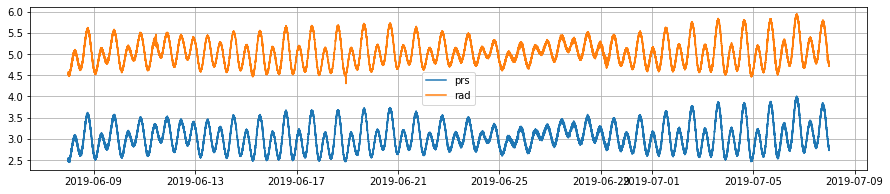

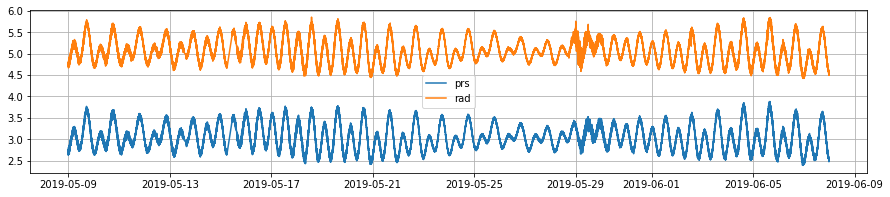

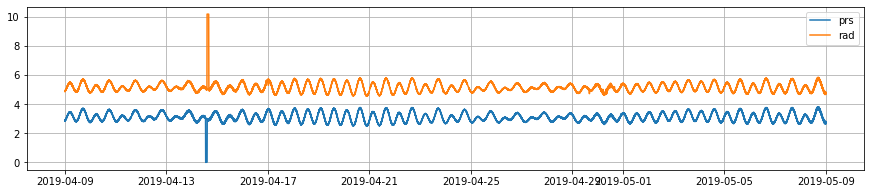

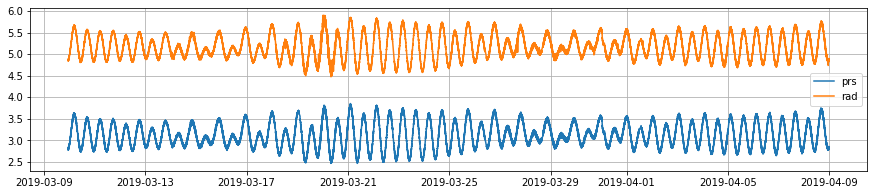

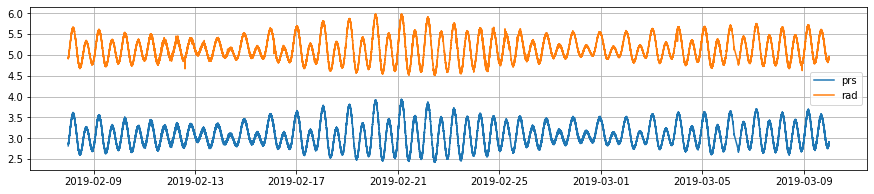

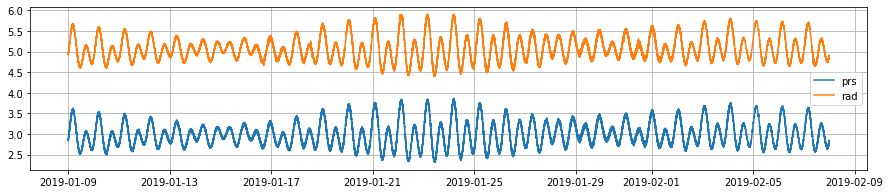

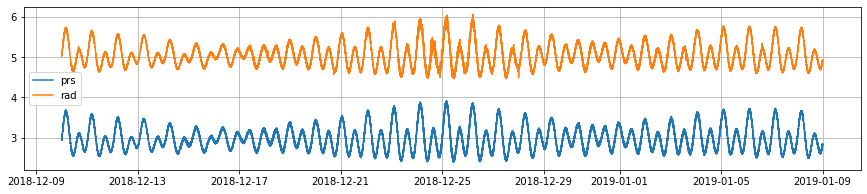

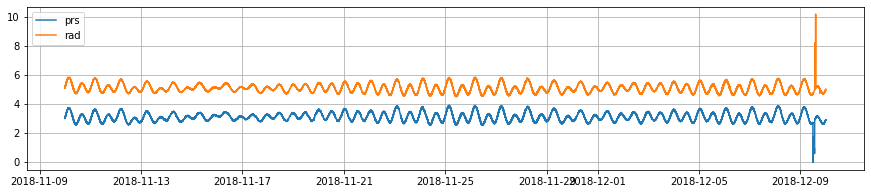

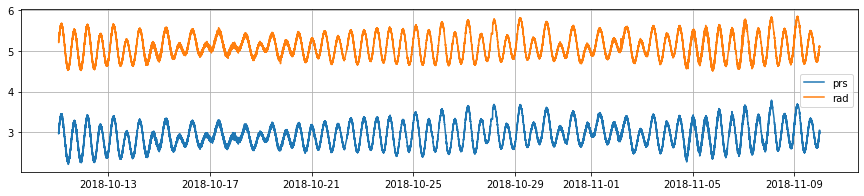

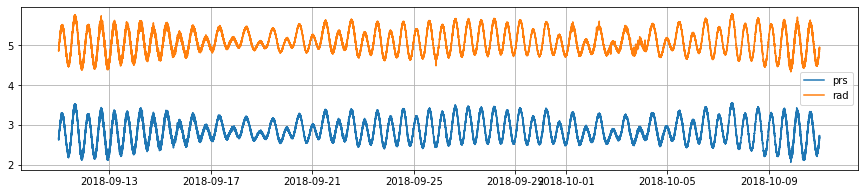

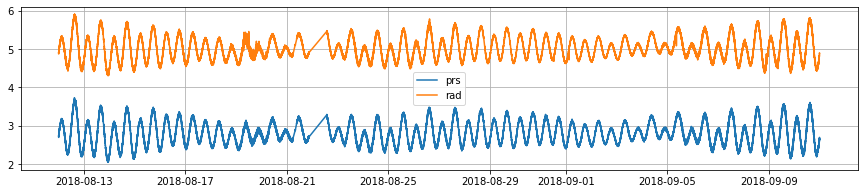

In [12]:
#extraer año completo y guardar como .txt
#aveces falla esta rutina ya que hay periodos seleccionados que no poseen datos 
ultima_fecha='2020-08-01'

ultima_fecha = dt.datetime.strptime(ultima_fecha, '%Y-%m-%d')
periodo=30 #dias a extraer (max 30)
code='juan' #codigo del mareografo

tiempo_mes=[] #listas que guardaran la columna tiempo, prs y rad 
prs_mes=[]
rad_mes=[]

meses=24 #rango de meses (o iteraciones) a extraer desde la ultima fecha hacia atras 

for i in range(meses):
    endtime=ultima_fecha-dt.timedelta(seconds=float(periodo)*(i)*24*60*60) #la fecha de termino de la iteracion actual
    
    #generar URL
    url_generado='http://www.ioc-sealevelmonitoring.org/bgraph.php?code='+code+'&output=tab&period='+str(periodo)+'&endtime='+str(endtime.strftime("%Y-%m-%d"))
    print(url_generado)
    
    
    #generar nombre de archivo. ejemplo: 2019-09-06to2019-08-07.txt
    timestr1 = str((ultima_fecha-dt.timedelta(seconds=float(periodo)*i*24*60*60)).strftime("%Y-%m-%d"))
    timestr0 = str((ultima_fecha-dt.timedelta(seconds=float(periodo)*(i+1)*24*60*60)).strftime("%Y-%m-%d"))
    savename=code+'_'+timestr0+'to'+timestr1+'.txt'
    
    #extrae datos de la pagina
    tiempo,prs,rad=ioc2data(url_generado,1) #debe estar la funcion ioc2data en la misma carpeta que este archivo jupyter
    tiempo_mes.extend(list(tiempo)) #guarda las columnas tiempo, prs y rad en las listas vacias
    prs_mes.extend(list(prs))
    rad_mes.extend(list(rad))

    with open(os.path.join(direccion_csv,savename), 'w',newline='') as f:
        writer = csv.writer(f, delimiter='\t')
        writer.writerows(zip(tiempo_mes,prs_mes,rad_mes)) #guarda cada fila en el formato "tiempo prs rad"
    
    print(savename)
    tiempo_mes=[] #resetea las listas para la siguiente iteracion 
    prs_mes=[]
    rad_mes=[]
    print()   

http://www.ioc-sealevelmonitoring.org/bgraph.php?code=valp&output=tab&period=30&endtime=2019-09-06
0 datos.


IndexError: index 0 is out of bounds for axis 0 with size 0

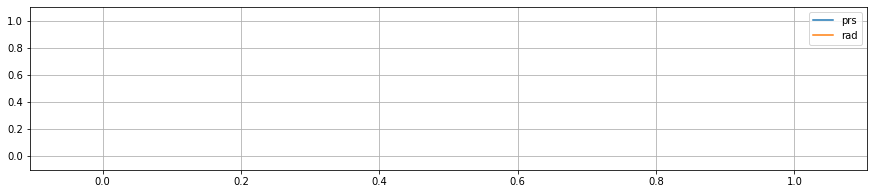

In [4]:
#extraer año completo y guardar como .txt
#aveces falla esta rutina ya que hay periodos seleccionados que no poseen datos 
ultima_fecha='2019-09-06'

ultima_fecha = dt.datetime.strptime(ultima_fecha, '%Y-%m-%d')
periodo=30 #dias a extraer (max 30)
code='valp' #codigo del mareografo
lat_mareografo=-33.02767128

tiempo_mes=[] #listas que guardaran la columna tiempo, prs y rad 
prs_mes=[]
rad_mes=[]

meses=12 #rango de meses (o iteraciones) a extraer desde la ultima fecha hacia atras 

i=0

endtime=ultima_fecha-dt.timedelta(seconds=float(periodo)*(i)*24*60*60) #la fecha de termino de la iteracion actual

#generar URL
url_generado='http://www.ioc-sealevelmonitoring.org/bgraph.php?code='+code+'&output=tab&period='+str(periodo)+'&endtime='+str(endtime.strftime("%Y-%m-%d"))
print(url_generado)


#generar nombre de archivo. ejemplo: 2019-09-06to2019-08-07.txt
timestr1 = str((ultima_fecha-dt.timedelta(seconds=float(periodo)*i*24*60*60)).strftime("%Y-%m-%d"))
timestr0 = str((ultima_fecha-dt.timedelta(seconds=float(periodo)*(i+1)*24*60*60)).strftime("%Y-%m-%d"))
savename=code+'_'+timestr0+'to'+timestr1+'.txt'

#extrae datos de la pagina
tiempo,prs,rad=ioc2data(url_generado,1) #debe estar la funcion ioc2data en la misma carpeta que este archivo jupyter
tiempo_mes.extend(list(tiempo)) #guarda las columnas tiempo, prs y rad en las listas vacias
prs_mes.extend(list(prs))
rad_mes.extend(list(rad))
with open(os.path.join(direccion_csv,savename), 'w',newline='') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(tiempo_mes,prs_mes,rad_mes)) #guarda cada fila en el formato "tiempo prs rad"

print(savename)
tiempo_mes=[] #resetea las listas para la siguiente iteracion 
prs_mes=[]
rad_mes=[]
print()   

# Pruebas

In [18]:
code='coqu'
#juntar series en una unica variable, no está compleeto ojo

for direccion_completa in glob.glob(os.path.join(direccion_csv,code+'*')):
    print(direccion_completa)
    
    #name=os.path.basename(direccion_completa)
    #print(name)

Z:\00 Memoria\Tareas\tarea02\data_ioc\coqu_2019-08-07to2019-09-06.txt
Z:\00 Memoria\Tareas\tarea02\data_ioc\coqu_2019-09-06to2019-10-06.txt
Z:\00 Memoria\Tareas\tarea02\data_ioc\coqu_2019-10-06to2019-11-05.txt
Z:\00 Memoria\Tareas\tarea02\data_ioc\coqu_2019-11-05to2019-12-05.txt
Z:\00 Memoria\Tareas\tarea02\data_ioc\coqu_2019-12-05to2020-01-04.txt
Z:\00 Memoria\Tareas\tarea02\data_ioc\coqu_2020-01-04to2020-02-03.txt
Z:\00 Memoria\Tareas\tarea02\data_ioc\coqu_2020-02-03to2020-03-04.txt
Z:\00 Memoria\Tareas\tarea02\data_ioc\coqu_2020-03-04to2020-04-03.txt
Z:\00 Memoria\Tareas\tarea02\data_ioc\coqu_2020-04-03to2020-05-03.txt
Z:\00 Memoria\Tareas\tarea02\data_ioc\coqu_2020-05-03to2020-06-02.txt
Z:\00 Memoria\Tareas\tarea02\data_ioc\coqu_2020-06-02to2020-07-02.txt
Z:\00 Memoria\Tareas\tarea02\data_ioc\coqu_2020-07-02to2020-08-01.txt


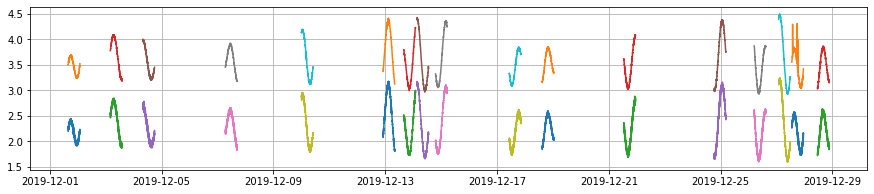

In [108]:
#codigos de prueba, busca ventanas con una cierta duracion especificada en vent_horas, sin saltos en el muestreo

vent_horas=10

#tiempos prss y rads son arreglos con las distintas series continuas
tiempos,prss,rads=segmentos(vent_horas*60*60,60,tiempo,prs,rad,1)

In [1]:
#pruebas de utide para las distintas series tiempos[i], prss[i]

i=3

#Utide
time=np.array(date2num(tiempos[i]))
u=np.array(prss[i])

coef = solve(time, u,v=None,lat=lat_mareografo,method='robust')
tide = reconstruct(time, coef)
f,S1,S2,coh2,phase,bw=FunXSpectra(u-tide.h,u-tide.h,60,4,0)

fig1, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15, 7),sharey=True)

ax1.plot(tiempos[i], u,label='Mareografo')
ax1.legend(numpoints=1, loc='lower right')
ax1.grid()

ax2.plot(tiempos[i], tide.h,label='utide')
ax2.legend(numpoints=1, loc='lower right')
ax2.grid()

ax3.plot(tiempos[i],u-tide.h,label='Residuo')
ax3.legend(numpoints=1, loc='lower right')
ax3.grid()

fig2, ax4 = plt.subplots()

ax4.plot(1/f/60,S1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(10,100)

ax4.grid(True)
ax4.set_xlabel('Periodo [min]')

NameError: name 'np' is not defined

solve: matrix prep ... solution ... diagnostics ... done.
prep/calcs ... done.


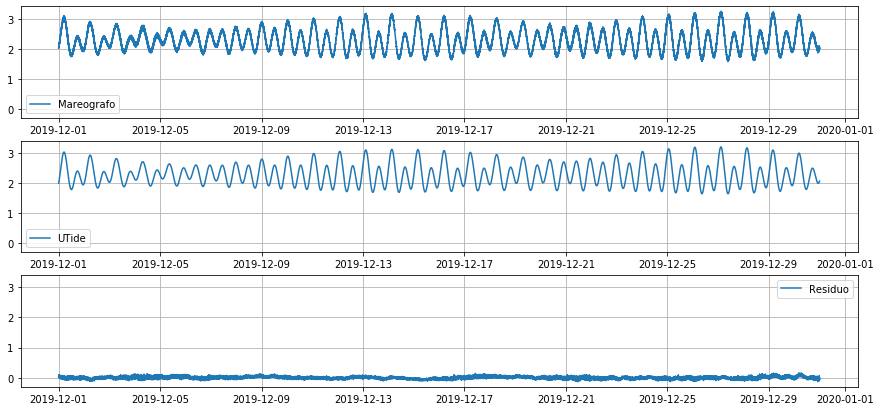

In [105]:
#mas pruebas de utide

#Utide
time=np.array(date2num(tiempo))
u=np.array(prs)

coef = solve(time, u,v=None,lat=lat_mareografo)
tide = reconstruct(time, coef)

#f,S1,S2,coh2,phase,bw=FunXSpectra(u-tide.h,u-tide.h,60,4,0)

fig1, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15, 7),sharey=True)

ax1.plot(tiempo, u,label='Mareografo')
ax1.legend(numpoints=1)
ax1.grid()

ax2.plot(tiempo, tide.h,label='UTide')
ax2.legend(numpoints=1)
ax2.grid()

ax3.plot(tiempo,u-tide.h,label='Residuo')
ax3.legend(numpoints=1)
ax3.grid()

#fig2, ax4 = plt.subplots()
#
#ax4.plot(1/f/60,S1)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(10,100)
#
#ax4.grid(True)
#ax4.set_xlabel('Periodo [min]')

0.15407608663843586